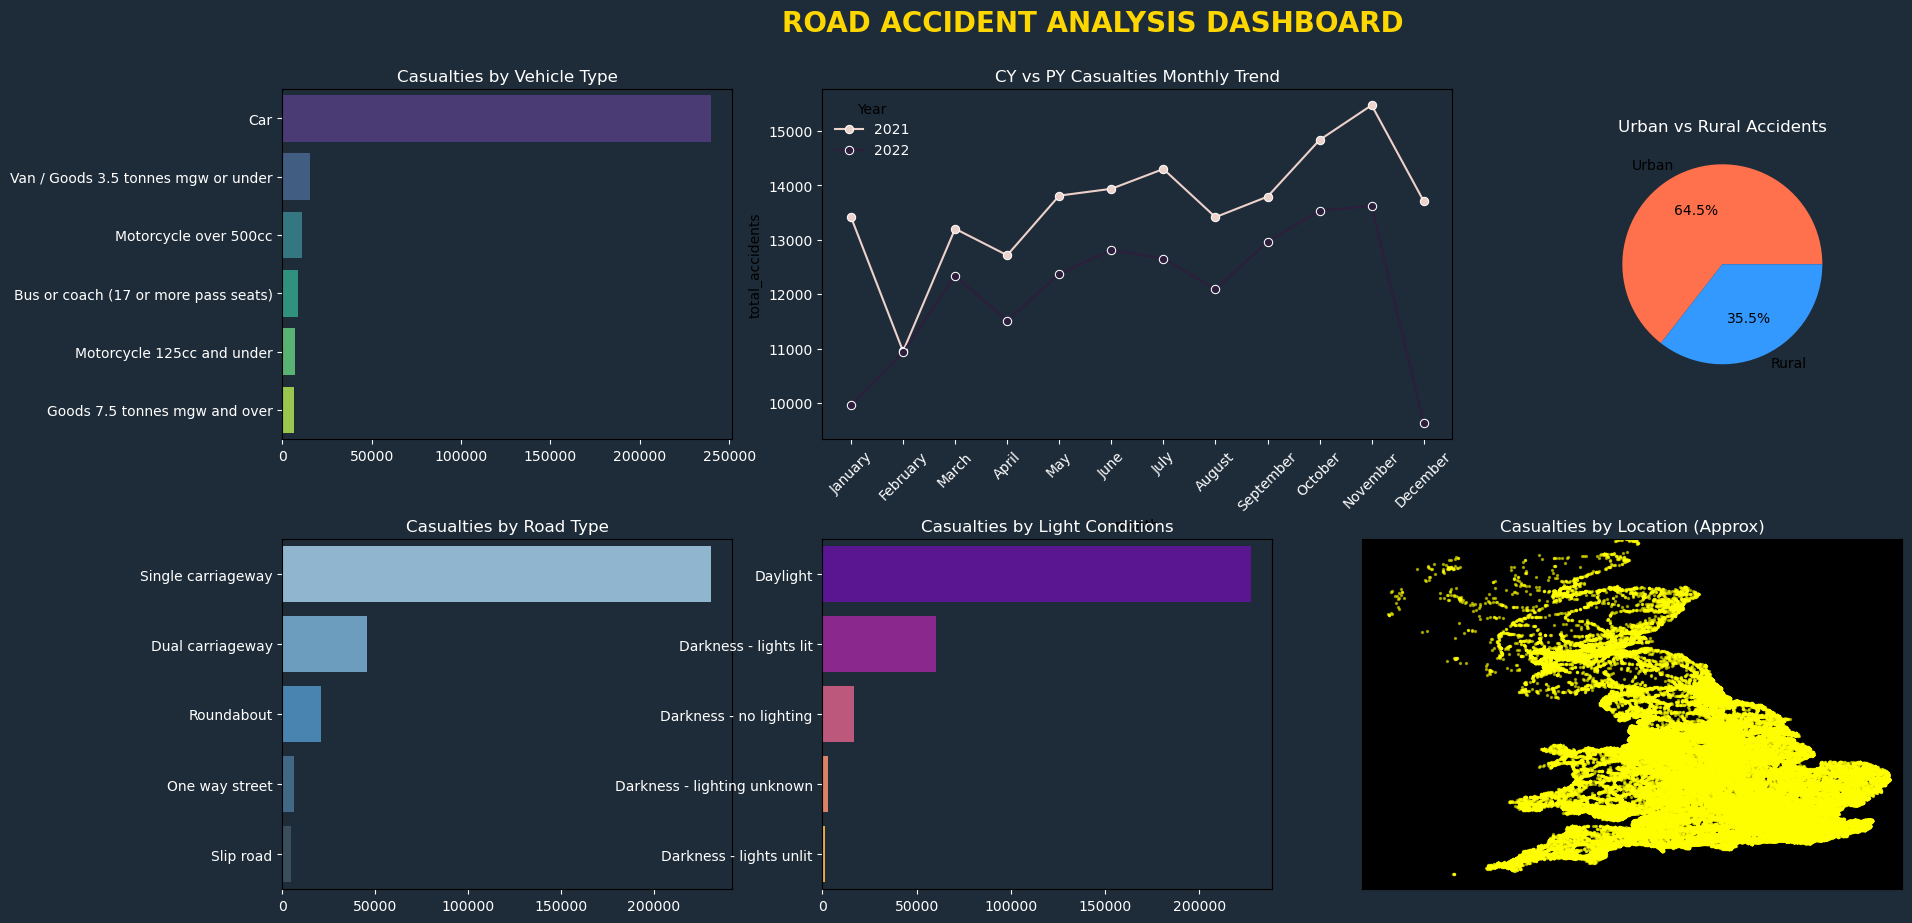

In [5]:
# --- Import Required Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load and Prepare Data ---
df = pd.read_excel("Road Accident Data.xlsx", sheet_name="Data")

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Rename for consistency
df.rename(columns={
    'date': 'accident_date',
    'accident_index': 'accident_index',
    'severity': 'accident_severity',
    'road_type': 'road_type',
    'light_conditions': 'light_conditions',
    'vehicle_type': 'vehicle_type',
    'number_of_casualties': 'casualties',
    'urban_or_rural_area': 'area_type',
    'weather_conditions': 'weather_conditions',
    'latitude': 'latitude',
    'longitude': 'longitude',
    'time': 'time'
}, inplace=True)

# Clean data
df.dropna(subset=['latitude', 'longitude'], inplace=True)
df['accident_date'] = pd.to_datetime(df['accident_date'], errors='coerce')
df['month'] = df['accident_date'].dt.month_name()
df['year'] = df['accident_date'].dt.year
df['hour'] = pd.to_datetime(df['time'], errors='coerce').dt.hour
df.drop_duplicates(inplace=True)

# --- Start Dashboard Layout ---
fig = plt.figure(figsize=(18, 10))
fig.patch.set_facecolor('#1e2b38')  # Dark background

# --- Title ---
fig.suptitle('ROAD ACCIDENT ANALYSIS DASHBOARD', fontsize=20, fontweight='bold', color='gold', y=0.98)

# --- Casualties by Vehicle Type ---
ax1 = fig.add_axes([0.05, 0.55, 0.25, 0.35])
vehicle_data = df['vehicle_type'].value_counts().head(6)
sns.barplot(y=vehicle_data.index, x=vehicle_data.values, ax=ax1,
            palette='viridis', hue=vehicle_data.index, legend=False)
ax1.set_title("Casualties by Vehicle Type", color='white')
ax1.tick_params(colors='white')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_facecolor('#1e2b38')

# --- Monthly Trend CY vs PY ---
monthly = df.groupby(['year', 'month']).size().reset_index(name='total_accidents')
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly['month'] = pd.Categorical(monthly['month'], categories=month_order, ordered=True)
monthly = monthly.sort_values(by=['year', 'month'])

ax2 = fig.add_axes([0.35, 0.55, 0.35, 0.35])
sns.lineplot(data=monthly, x='month', y='total_accidents', hue='year', marker='o', ax=ax2)
ax2.set_title('CY vs PY Casualties Monthly Trend', color='white')
ax2.tick_params(axis='x', labelrotation=45, colors='white')
ax2.tick_params(axis='y', colors='white')
ax2.set_facecolor('#1e2b38')
ax2.legend(frameon=False, labelcolor='white', title='Year', title_fontsize=10)

# --- Urban vs Rural Pie ---
ax3 = fig.add_axes([0.75, 0.6, 0.2, 0.25])
area_data = df['area_type'].value_counts()
ax3.pie(area_data, labels=area_data.index, autopct='%1.1f%%', colors=['#ff704d', '#3399ff'])
ax3.set_title('Urban vs Rural Accidents', color='white')

# --- Casualties by Road Type ---
ax4 = fig.add_axes([0.05, 0.1, 0.25, 0.35])
road_data = df['road_type'].value_counts().head(6)
sns.barplot(y=road_data.index, x=road_data.values, ax=ax4,
            palette='Blues_d', hue=road_data.index, legend=False)
ax4.set_title("Casualties by Road Type", color='white')
ax4.tick_params(colors='white')
ax4.set_xlabel('')
ax4.set_ylabel('')
ax4.set_facecolor('#1e2b38')

# --- Casualties by Light Conditions ---
ax5 = fig.add_axes([0.35, 0.1, 0.25, 0.35])
light_data = df['light_conditions'].value_counts()
sns.barplot(y=light_data.index, x=light_data.values, ax=ax5,
            palette='plasma', hue=light_data.index, legend=False)
ax5.set_title("Casualties by Light Conditions", color='white')
ax5.tick_params(colors='white')
ax5.set_xlabel('')
ax5.set_ylabel('')
ax5.set_facecolor('#1e2b38')

# --- Casualty Map (Scatter Plot without GeoPandas) ---
ax6 = fig.add_axes([0.65, 0.1, 0.3, 0.35])
ax6.scatter(df['longitude'], df['latitude'], alpha=0.5, s=2, color='yellow')
ax6.set_title('Casualties by Location (Approx)', color='white')
ax6.set_xlim(-8, 2)
ax6.set_ylim(49.5, 59)
ax6.set_facecolor('black')
ax6.set_xticks([])
ax6.set_yticks([])

# --- Show Dashboard ---
plt.show()
